In [1]:
##importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Enter Porosity: 0.19
Enter Perm.(md): 8.2
Enter pay zone thicknes(Feet): 53
Enter  Reservoir Pressure(psi): 5651
Enter Bubble Point Pressure(psi): 5651
Enter Formation Volume Factor: 1.1
Enter fluid viscosity(cp): 1.7
Enter Total Compressibility(psi-1): 0.0000129
Enter Drainage Area(Acres): 640
Enter Wellbore radius(ft): 0.328
Enter Skin Factor: 0
The value of productivity index is 0.19678102247296522
The value of Absolute open flow is  617.783087774848 stb/day
    Pressures  flowrates_vogel
0        5651         0.000000
1        5000       121.545450
2        4500       205.991550
3        4000       282.699353
4        3500       351.668859
5        3000       412.900068
6        2500       466.392981
7        2000       512.147596
8        1500       550.163914
9        1000       580.441936
10        500       602.981660
11          0       617.783088


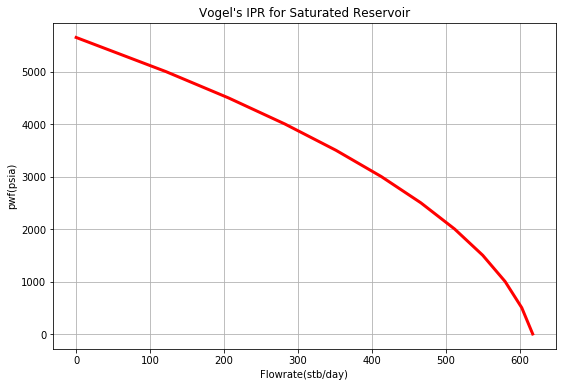

In [12]:
##input parameters
porosity = float(input("Enter Porosity: "))
K = float(input("Enter Perm.(md): "))
h = float(input("Enter pay zone thicknes(Feet): "))
P = float(input("Enter  Reservoir Pressure(psi): "))
Pb = float(input("Enter Bubble Point Pressure(psi): "))
Bo = float(input("Enter Formation Volume Factor: "))
Viscosity  = float(input("Enter fluid viscosity(cp): "))
ct = float(input("Enter Total Compressibility(psi-1): "))
A = float(input("Enter Drainage Area(Acres): "))
re = np.sqrt(43560*A/3.14)
rw = float(input("Enter Wellbore radius(ft): "))
S = float(input("Enter Skin Factor: "))
##Calculation of productivity index
J = K*h/(141.2*Bo*Viscosity*(np.log(re/rw)-0.75+S))
print("The value of productivity index is", J)
##Calculation of Absolute open flow
qmax = J*P/1.8
print("The value of Absolute open flow is ", qmax, "stb/day")
##Pressures array
a = np.arange(0,5500,500)
b = np.append(a,5651)
pwf = b[-1::-1]
##Calculation of flowrate
flowrate = []
for i in pwf:
    q = qmax*(1-0.2*(i/P)-0.8*((i/P)**2))
    flowrate.append(q)
flowrates = np.array(flowrate)
df = pd.DataFrame()
df["Pressures"] = pwf
df["flowrates_vogel"] =flowrates
##plotting IPR
plt.figure(figsize = (9,6))
plt.plot(flowrates,pwf,c = "red",linewidth=3)
plt.xlabel("Flowrate(stb/day)")
plt.ylabel("pwf(psia)")
plt.grid(True)
plt.title("Vogel's IPR for Saturated Reservoir")
print(df)

In [13]:
## Code written by Jaiyesh chahar
## Input parameters taken from Boyun Guo